In [15]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_data=pd.read_csv('../data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
name=train_data['Name']
train_data['Title']=[i.split('.')[0].split(',')[-1].strip() for i in name]

In [33]:
train_data['Cabin'].value_counts()
    

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [25]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [18]:
train_data['Title']=train_data['Title'].replace(['Lady','the Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'other')

In [26]:
for i in range(len(train_data['Title'])):
    if train_data['Title'][i]=='Mr':
        train_data['Title'][i]=1
    elif train_data['Title'][i]=='Mrs':
        train_data['Title'][i]=2
    elif train_data['Title'][i]=='Miss':
        train_data['Title'][i]=3
    elif train_data['Title'][i]=='Master':
        train_data['Title'][i]=4
    else:
        train_data['Title'][i]=5

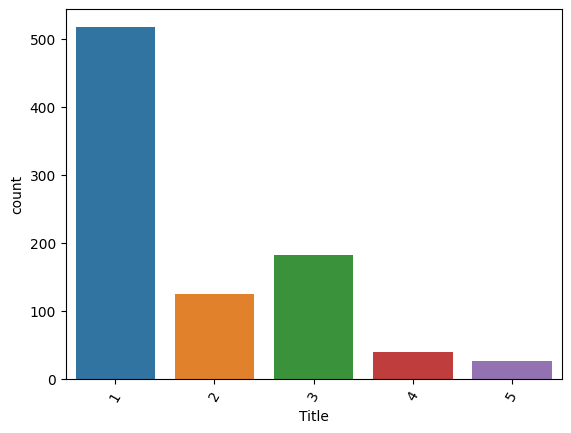

In [27]:
sns.countplot(x='Title', data=train_data)
plt.xticks(rotation=60)
plt.show()